# Acidentes de trânsito - Dados abertos prefeitura do Recife

A base de dados trata dos acidentes de trânsito ocorridos na cidade do recife, e possui informações sobre o endereço no qual o acidente ocorreu (endereço, bairro, número), e também informações referentes à via na qual esse acidente aconteceu, como o estado de conservação, velocidade máxima. Também existem campos relativos ao tipo de acidente (colisão, atropelamento, entre outros), e quais foram os envolvidos no acidente (moto, carro, pedestre, ciclista).

link para os dados: http://dados.recife.pe.gov.br/dataset/acidentes-de-transito-com-e-sem-vitimas

dicionário de dados: http://dados.recife.pe.gov.br/dataset/acidentes-de-transito-com-e-sem-vitimas/resource/1eed10b9-fe8a-4e5a-86cf-ad0353f05682

In [54]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('/content/drive/MyDrive/MD_grupo4/bd_acidentes_2020.csv')

## Tratando os dados

Na base de dados existem os campos de hora e data, mas que estão em formato de texto, que serão convertidos para timestamp, e assim vão ser criados novos campos:



1.  Dia da semana (a partir da data)
2.  Período do dia (manhã, tarde, noite, madrugada)




In [56]:
def convert_period(x):

  minutes = x.minute
  hour = x.hour

  if (hour >= 6 and hour < 12):
    return 'manhã'

  elif (hour >= 12 and hour < 18):
    return 'tarde'

  elif (hour >= 18 and hour < 24):
    return 'noite'

  elif (hour >= 0 and hour < 6):
    return 'madrugada'

dicio_placa = {
  'Placas Dê a preferência': 'Dê a preferência',
  'Placas Pare': 'Pare',
  'Outras':  'Outras',
  'Não há placas': 'Não há placas',
  'R-6a': 'Proibido estacionar',
  'R-6c': 'Proibido parar e estacionar',
  'R-19': 'Velocidade máxima permitida',
  'R-6b': 'Estacionamento regulamentado',
  'R-4a': 'Proibido virar à esquerda',
  'R-5a': 'Proibido retornar à esquerda',
  'R-3': 'Sentido proibido',
  'R-4b': 'Proibido virar à direita',
  'R-25b': 'Vire à direita',
  'R-25d': 'Siga em frente ou à direita',
  'R-32': 'Circulação exclusiva de ônibus',
  'R-26': 'Siga em frente',
  'R-24a': 'Sentido de circulação da via',
  'R-8a': 'Proibido mudar de faixa da esq para dir',
  'R-25a': 'Vire à esquerda',
  'R-31': 'Pedestre, ande pela direita',
  'R-34': 'Circulação exclusiva de bicicletas',
  'R-5b': 'Proibido retornar à direita'
}

dicio_weekday = {
  0: 'Segunda-feira',
  1: 'Terça-feira',
  2: 'Quarta-feira',
  3: 'Quinta-feira',
  4: 'Sexta-feira',
  5: 'Sábado',
  6: 'Domingo'
}

# convertendo o campo data para timestamp
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

df['data_'] = pd.to_datetime(df['data'], format='%Y-%m-%d').dt.date

# campo com o id do dia da semana 
df['id_dia_semana'] = df['data'].apply(pd.Timestamp.weekday)

# convertendo para dias da semana
df['dia_semana'] = df['id_dia_semana'].map(dicio_weekday)

# convertendo hora para time
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S').dt.time

df['periodo_dia'] = df['hora'].apply(convert_period)

df['mes'] = df['data'].apply(pd.Timestamp.month_name)

df['situacao_placa'] = [ dicio_placa[x] if type(x) == str else x for x in df['situacao_placa']]

df['dia'] = [x.dayofyear for x in df.data]

df['velocidade_max_via'] = [ x.lower().replace('km/h', '').replace('km', '') if type(x) == str  else x for x in df['velocidade_max_via']]
df['velocidade_max_via'] = [np.nan if x == 'n/i' else x for x in df['velocidade_max_via']]
df = df.astype({'velocidade_max_via': 'float'})


In [57]:
df_19 = pd.read_csv('/content/drive/MyDrive/MD_grupo4/acidentes_2019.csv', index_col=0)
df_19.reset_index(inplace=True)

# convertendo o campo data para timestamp

df_19['DATA'] = pd.to_datetime(df_19['DATA'], format='%Y-%m-%d')
df_19['DATA_'] = pd.to_datetime(df_19['DATA'], format='%Y-%m-%d').dt.date

df_19['data_new'] = df_19.DATA_.apply(lambda x: str(x)[5:])
df['data_new'] = df.data_.apply(lambda x: str(x)[5:])

In [ ]:
df.to_csv('/content/drive/MyDrive/MD_grupo4/acidentes_clean.csv')

# Criando bases para popular o bd

In [ ]:
del df_norm['_id']
df_norm.to_csv('/content/drive/MyDrive/MD_grupo4/acidentes_clean2.csv')

In [ ]:
df_norm = pd.read_csv('/content/drive/MyDrive/MD_grupo4/acidentes_clean.csv', index_col=0)

,_id,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,id_dia_semana,dia_semana,periodo_dia,mes
0,1,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,NaN,NaN,COLISÃO,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Quarta-feira,madrugada,January
1,2,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,80.0,SUBURBIO,ABALROAMENTO LONGITUDINAL,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60.0,Dupla,Canteiro central,NaN,NaN,2,Quarta-feira,madrugada,January
2,3,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,494.0,SUBURBIO,CHOQUE VEÍCULO PARADO,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN,2,Quarta-feira,madrugada,January
3,4,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,NaN,CIDADE,COLISÃO TRASEIRA,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Proibido estacionar,NaN,Única,Faixa seccionada,NaN,NaN,2,Quarta-feira,madrugada,January
4,5,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,672.0,SUBURBIO,ABALROAMENTO TRANSVERSAL,COLISÃOENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central,2,Quarta-feira,madrugada,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4088,2020-12-30,17:30:00,SEM VÍTIMA,FINALIZADA,DERBY,AV GOVERNADOR AGAMENON MAGALHAES,NaN,RUA JOAQUIM NABUCO,AO LADO DO HOSPITAL DA RESTAURAÇÃO,DERBY,NaN,NaN,COLISÃO,COLISÃO COM VEICULO OFICIAL / CARRO X USB,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Quarta-feira,tarde,December
4088,4089,2020-12-30,18:57:00,SEM VÍTIMA,CANCELADA,ARRUDA,AV PROFESSOR JOSE DOS ANJOS,NaN,AV BEBERIBE,NaN,ARRUDA,131.0,NaN,COLISÃO,COLISÃO SEM VÍTIMAS- UMA DAS PARTES APRESENTA ...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Quarta-feira,noite,December
4089,4090,2020-12-30,20:38:00,COM VÍTIMA,FINALIZADA,MANGABEIRA,AV NORTE,4560,NaN,EM FRENTE AO SESC DE CASA AMARELA/VÍTIMA JÁ SO...,MANGABEIRA,NaN,NaN,ATROPELAMENTO,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,NaN,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,NaN,Dupla,Canteiro central,NaN,NaN,2,Quarta-feira,noite,December
4090,4091,2020-12-31,15:47:00,COM VÍTIMA,FINALIZADA,CASA AMARELA,EST DAS UBAIAS,147,NaN,NaN,CASA AMARELA,NaN,CIDADE,COLISÃO FRONTAL,COM VÍTIMA,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,NaN,Dupla,Não existe,NaN,NaN,3,Quinta-feira,tarde,December


In [ ]:
acidente = df_norm.loc[:, ['_id','natureza_acidente', 'tipo', 'descricao', 'acidente_verificado', 'tempo_clima', 'vitimas', 'vitimasfatais', 'situacao']]
endereco = df_norm.loc[:, ['_id','endereco', 'numero', 'detalhe_endereco_acidente', 'complemento', 'bairro', 'bairro_cruzamento']]
via = df_norm.loc[:, ['_id','velocidade_max_via', 'sentido_via', 'mao_direcao', 'sinalizacao', 'situacao_semaforo', 'ponto_controle', 'divisao_via1', 'divisao_via2', 'divisao_via3', 'conservacao_via', 'num_semaforo', 'condicao_via', 'conservacao_via', 'situacao_placa']]
data = df_norm.loc[:, [ '_id','hora','data', 'mes',  'periodo_dia','dia_semana']]
envolvidos = df_norm.loc[:, ['_id','auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros']]

In [ ]:
acidente.rename(columns={'_id': 'id_acidente'}, inplace=True)
endereco.rename(columns={'_id': 'id_endereco'}, inplace=True)
via.rename(columns={'_id': 'id_via'}, inplace=True)
data.rename(columns={'_id': 'id_data'}, inplace=True)
envolvidos.rename(columns={'_id': 'id_envolvidos'}, inplace=True)

In [ ]:
acidente_tbl = pd.concat([acidente, endereco.iloc[:,0] -1, via.iloc[:,0] -1, data.iloc[:,0] -1, envolvidos.iloc[:,0] -1], join='outer', axis=1)

In [ ]:
del via['id_via']
del envolvidos['id_envolvidos']
del data['id_data']
del acidente_tbl['id_acidente']
del endereco['id_endereco']
# salvando as bases de dados no drive
envolvidos.to_csv('/content/drive/MyDrive/MD_grupo4/dados/envolvidos2.csv', index_label='id_envolvidos')
via.to_csv('/content/drive/MyDrive/MD_grupo4/dados/via.csv', index_label='id_via')
endereco.to_csv('/content/drive/MyDrive/MD_grupo4/dados/endereco.csv', index_label='id_endereco')
data.to_csv('/content/drive/MyDrive/MD_grupo4/dados/data.csv', index_label='id_data')
acidente_tbl.to_csv('/content/drive/MyDrive/MD_grupo4/dados/acidente.csv', index_label='id_acidente')

# Consultas

In [ ]:
df_norm = pd.read_csv('/content/drive/MyDrive/MD_grupo4/acidentes_clean.csv', index_col=0)

In [ ]:
# número de acidentes por dia da semana
df.groupby('dia_semana').agg('count').sort_values('_id', ascending=True)

,_id,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,id_dia_semana,periodo_dia
dia_semana,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Domingo,370,370,370,370,370,367,370,221,150,328,367,100,245,370,363,316,144,3,17,13,42,8,9,1,370,0,285,291,285,287,288,285,274,258,73,286,273,26,8,370,370
Sábado,485,485,485,485,485,482,483,275,198,433,482,137,321,485,472,412,211,1,18,19,51,25,6,7,484,2,371,388,380,377,387,379,360,352,113,378,360,37,5,485,485
Terça-feira,631,631,631,631,631,629,628,360,262,560,628,171,459,631,621,537,246,2,29,29,76,53,10,11,630,2,514,529,526,516,528,520,496,485,191,519,514,58,11,631,631
Quarta-feira,635,635,635,635,635,631,634,352,252,559,631,178,457,635,621,540,275,5,19,19,72,48,13,8,634,1,527,540,533,537,536,534,501,483,167,528,517,54,11,635,635
Sexta-feira,644,644,644,644,644,637,643,353,273,557,637,176,454,644,622,555,276,2,23,24,74,53,9,10,643,3,507,525,515,516,524,515,488,475,159,514,498,48,11,644,644
Quinta-feira,660,660,660,659,659,651,657,371,268,591,651,176,453,660,643,553,271,1,24,25,78,64,9,14,654,8,539,551,545,536,549,541,515,502,211,540,526,66,13,660,660
Segunda-feira,667,667,667,667,667,661,664,385,270,586,661,195,456,667,646,571,269,5,22,26,98,44,16,9,663,5,547,553,543,542,553,543,508,498,182,540,524,60,7,667,667


In [ ]:
# número de vítimas por dia da semana
df.groupby('dia_semana').agg('sum').sort_values('vitimas', ascending=True)

,_id,num_semaforo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,id_dia_semana
dia_semana,,,,,,,,,,,,,,
Domingo,827566,29280.0,470.0,152.0,3.0,18.0,15.0,42.0,8.0,9.0,2.0,204.0,0.0,2220
Sábado,1008932,37522.0,596.0,227.0,1.0,19.0,27.0,51.0,25.0,6.0,8.0,256.0,2.0,2425
Sexta-feira,1268640,49492.0,812.0,297.0,2.0,23.0,24.0,75.0,53.0,9.0,10.0,311.0,3.0,2576
Quarta-feira,1285092,48379.0,804.0,295.0,5.0,19.0,20.0,74.0,50.0,13.0,8.0,323.0,1.0,1270
Terça-feira,1303777,49243.0,812.0,272.0,2.0,29.0,32.0,76.0,54.0,10.0,11.0,323.0,2.0,631
Segunda-feira,1354903,55005.0,837.0,296.0,5.0,22.0,27.0,102.0,45.0,17.0,9.0,326.0,4.0,0
Quinta-feira,1325368,48060.0,808.0,299.0,1.0,24.0,26.0,80.0,67.0,9.0,14.0,346.0,8.0,1980


In [ ]:
# quantidade de acidentes fatais por dia da semana
df.where(df.vitimasfatais > 0).groupby('dia_semana').agg('count').sort_values('_id', ascending=True)

,_id,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,id_dia_semana,periodo_dia
dia_semana,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Quarta-feira,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1
Sábado,2,2,2,2,2,2,2,0,1,2,2,1,2,2,1,1,1,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,1,1,2,2,1,1,2,2
Terça-feira,2,2,2,2,2,2,2,1,2,2,2,1,1,2,2,1,1,0,0,1,0,1,0,0,1,2,2,2,2,2,2,2,1,2,0,2,2,0,0,2,2
Sexta-feira,3,3,3,3,3,3,3,0,1,3,3,0,2,3,3,2,2,0,1,0,0,0,0,0,2,3,3,3,3,3,3,3,3,3,2,3,3,1,0,3,3
Segunda-feira,4,4,4,4,4,4,4,2,4,4,4,3,3,4,4,3,2,0,0,0,1,1,0,0,1,4,4,4,4,4,4,4,4,3,2,4,3,0,0,4,4
Quinta-feira,8,8,8,8,8,8,8,5,6,7,8,3,5,8,8,2,6,0,1,2,4,1,0,0,3,8,7,7,7,7,7,6,6,7,1,7,7,0,0,8,8


In [ ]:
# acidentes por faixa de horário
df.groupby('periodo_dia').agg('count').sort_values('_id', ascending=True)

,_id,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,id_dia_semana,dia_semana
periodo_dia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
madrugada,199,199,199,199,199,199,199,73,96,165,199,74,137,199,189,177,45,1,5,2,12,8,3,2,199,2,144,150,144,145,148,148,130,124,38,146,140,15,3,199,199
noite,924,924,924,924,924,915,922,515,386,823,915,212,622,924,909,761,419,3,37,40,119,57,16,7,920,7,699,713,700,698,708,701,661,651,194,704,666,63,15,924,924
manhã,1402,1402,1402,1402,1402,1390,1397,830,558,1239,1389,399,999,1402,1359,1180,566,8,62,43,176,134,36,26,1396,8,1178,1202,1188,1184,1201,1184,1128,1100,439,1177,1150,124,22,1402,1402
tarde,1567,1567,1567,1566,1566,1554,1561,899,633,1387,1554,448,1087,1567,1531,1366,662,7,48,70,184,96,17,25,1563,4,1269,1312,1295,1284,1308,1284,1223,1178,425,1278,1256,147,26,1567,1567


In [ ]:
# acidentes por período e dia da semana
df.groupby(['periodo_dia', 'dia_semana']).agg('count')

_id  data  ...  divisao_via3  id_dia_semana
periodo_dia dia_semana                ...                             
madrugada   Domingo         45    45  ...             0             45
            Quarta-feira    18    18  ...             1             18
            Quinta-feira    24    24  ...             0             24
            Segunda-feira   27    27  ...             0             27
            Sexta-feira     29    29  ...             1             29
            Sábado          35    35  ...             1             35
            Terça-feira     21    21  ...             0             21
manhã       Domingo         97    97  ...             3             97
            Quarta-feira   250   250  ...             4            250
            Quinta-feira   234   234  ...             3            234
            Segunda-feira  233   233  ...             2            233
            Sexta-feira    206   206  ...             5            206
            Sábado         144   144  ...             0            144
            Terça-feira    238   238  ...             5            238
noite       Domingo        106   106  ...             2            106
            Quarta-feira   126   126  ...             3            126
            Quinta-feira   135   135  ...             4            135
            Segunda-feira  144   144  ...             1            144
            Sexta-feira    171   171  ...             2            171
            Sábado         111   111  ...             0            111
            Terça-feira    131   131  ...             3            131
tarde       Domingo        122   122  ...             3            122
            Quarta-feira   241   241  ...             3            241
            Quinta-feira   267   267  ...             6            267
            Segunda-feira  263   263  ...             4            263
            Sexta-feira    238   238  ...             3            238
            Sábado         195   195  ...             4            195
            Terça-feira    241   241  ...             3            241

[28 rows x 40 columns]

In [ ]:
# top 5 bairros com maior incidência de acidentes
top5_bairros =list(df.groupby('bairro').agg('count').sort_values('_id', ascending=False).iloc[:5,0].keys())
df.groupby('bairro').agg('count').sort_values('_id', ascending=False).iloc[:5, 1]

bairro
BOA VIAGEM     513
IMBIRIBEIRA    234
SANTO AMARO    176
BOA VISTA      172
MADALENA       154
Name: data, dtype: int64

In [ ]:
df_top5 = df[df.bairro.isin(top5_bairros)]
df_top5.groupby(['bairro','periodo_dia']).agg('count')

_id  data  hora  ...  id_dia_semana  dia_semana  mes
bairro      periodo_dia                   ...                                
BOA VIAGEM  madrugada     45    45    45  ...             45          45   45
            manhã        126   126   126  ...            126         126  126
            noite        131   131   131  ...            131         131  131
            tarde        211   211   211  ...            211         211  211
BOA VISTA   madrugada      7     7     7  ...              7           7    7
            manhã         62    62    62  ...             62          62   62
            noite         25    25    25  ...             25          25   25
            tarde         78    78    78  ...             78          78   78
IMBIRIBEIRA madrugada      8     8     8  ...              8           8    8
            manhã        102   102   102  ...            102         102  102
            noite         46    46    46  ...             46          46   46
            tarde         78    78    78  ...             78          78   78
MADALENA    madrugada      6     6     6  ...              6           6    6
            manhã         53    53    53  ...             53          53   53
            noite         25    25    25  ...             25          25   25
            tarde         70    70    70  ...             70          70   70
SANTO AMARO madrugada      7     7     7  ...              7           7    7
            manhã         69    69    69  ...             69          69   69
            noite         37    37    37  ...             37          37   37
            tarde         63    63    63  ...             63          63   63

[20 rows x 41 columns]

In [ ]:
# top 5 bairros com menor incidência de acidentes
bottom5 = list(df.groupby('bairro').agg('count').sort_values('_id').iloc[:5, 1].keys())
df_bottom5 = df[df.bairro.isin(bottom5)]
df.groupby('bairro').agg('count').sort_values('_id').iloc[:5, 1]

bairro
TOTÓ                  1
HIPÓDROMO             2
BREJO DA GUABIRABA    3
BRASÍLIA TEIMOSA      3
SANTANA               3
Name: data, dtype: int64

In [ ]:
# acidentes com vítimas incluindo vítimas fatais
df[df.natureza_acidente.isin(['COM VÍTIMA', 'VÍTIMA FATAL'])]

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
7,2020-01-01,09:06:00,COM VÍTIMA,FINALIZADA,PINA,AVENIDA CELSO FURTADO (VIA MANGUE),NaN,NaN,PROX: SHOPPING RIO MAR . ULTIMA CURVA ANTES DO...,PINA,NaN,BOA VIAGEM,CHOQUE OBJETO FIXO,COLISAO COM DUAS VITIMA. MOTO COM GLADIO DA VIA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,Não há placas,60 km/h,Dupla,Faixa seccionada,NaN,NaN
8,2020-01-01,10:07:00,COM VÍTIMA,FINALIZADA,MADALENA,EST DOS REMEDIOS,2328,NaN,LADO OPOSTO AO LESSA DE ANDRADE,MADALENA,NaN,SUBURBIO,CHOQUE OBJETO FIXO,PEGEOUT SE CHOCOU COM POSTE E COM O GRADIL DA ...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Placas Pare,NaN,Única,Faixa seccionada,NaN,NaN
14,2020-01-01,23:46:00,COM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA DEZ DE JULHO,210,RUA CAMBOIM,APÓS A ESTAÇÃO AEROPORTO / NA RUA DO SALÃO DE ...,BOA VIAGEM,NaN,BEIRA MAR,COLISÃO FRONTAL,ENTRE AUTO E MOTO. C/V,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Outros,Placas Pare,NaN,Única,Faixa seccionada,NaN,NaN
16,2020-01-02,06:14:00,COM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,63,RUA GONCALVES DE MAGALHAES,E/F A AMERICA FILM E POSTO IPIRANGA,AREIAS,393.0,CIDADE,ABALROAMENTO LONGITUDINAL,COLISÃO C/VITIMA ENTRE UMA MOTO E UM ONIBUS,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,60 km/h,Dupla,Canteiro central,NaN,NaN
23,2020-01-02,10:33:00,COM VÍTIMA,FINALIZADA,BARRO,AV DR JOSE RUFINO,67,RUA MAJOR CHAGAS DE OLIVEIRA,NA ENTRADA DA BR 101 (AUTO ELÉTRICA VAL),BARRO,NaN,CIDADE,ABALROAMENTO TRANSVERSAL,COLISÃO C/VITIMA ENTRE UMA MOTO E UM AUTO,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Cruzamento,Bom,Não existe,NaN,Seca,Mal conservada,Não existe,Não há placas,NaN,Dupla,Faixa contínua,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,2020-12-30,14:04:00,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,1672,NaN,RROX AO POSTO IPIRANGA / PROX A FEIRA LIVRE DO...,JORDÃO,NaN,NaN,COLISÃO TRASEIRA,COLISÃO MOTO X CARRO,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Cruzamento,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
4085,2020-12-30,15:43:00,COM VÍTIMA,FINALIZADA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,290,RUA SAO CAETANO,APÓS O SUPERMERCADO STILOS / PRÓX À MISSÃO EVA...,CAMPO GRANDE,NaN,NaN,COLISÃO,AGUARDANDO ATENDIMENTO DO SAMU.,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,NaN,NaN,Dupla,Não existe,NaN,NaN
4089,2020-12-30,20:38:00,COM VÍTIMA,FINALIZADA,MANGABEIRA,AV NORTE,4560,NaN,EM FRENTE AO SESC DE CASA AMARELA/VÍTIMA JÁ SO...,MANGABEIRA,NaN,NaN,ATROPELAMENTO,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,NaN,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,NaN,Dupla,Canteiro central,NaN,NaN
4090,2020-12-31,15:47:00,COM VÍTIMA,FINALIZADA,CASA AMARELA,EST DAS UBAIAS,147,NaN,NaN,CASA AMARELA,NaN,CIDADE,COLISÃO FRONTAL,COM VÍTIMA,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,NaN,Dupla,Não existe,NaN,NaN


In [ ]:
df_fatal = df[df.natureza_acidente == 'VÍTIMA FATAL'].copy()
df_fatal.tipo.value_counts()

ABALROAMENTO TRANSVERSAL     6
CHOQUE OBJETO FIXO           3
ATROPELAMENTO                3
COLISÃO COM CICLISTA         2
CHOQUE VEÍCULO PARADO        2
COLISÃO FRONTAL              2
ABALROAMENTO LONGITUDINAL    1
COLISÃO                      1
Name: tipo, dtype: int64

# Visualizações

In [63]:
dicio_meses = {
    '01':'Janeiro',
    '02': 'Fevereiro',
    '03': 'Março',
    '04': 'Abril',
    '05': 'Maio',
    '06': 'Junho',
    '07': 'Julho',
    '08': 'Agosto',
    '09': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'}
df['new_data'] = df.data_new.apply(lambda x:str(x[3:]) + '-' + dicio_meses[str(x[:2])] )
df_19['new_data'] = df_19.data_new.apply(lambda x:str(x[3:]) + '-' + dicio_meses[str(x[:2])] )

,_id,DATA,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,endereco_cruzamento,numero_cruzamento,referencia_cruzamento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,DATA_,data_new,new_data
0,1,2019-01-01,00:41:00,SEM VÍTIMA,FINALIZADA,IPSEP,AV RECIFE,NaN,NaN,LADO OPOSTO AO Nº 3257,AV RECIFE,NaN,LADO OPOSTO AO Nº 3257,IPSEP,NaN,SUBURBIO,COLISÃO TRASEIRA,"ART.181, OBSTRUÇÃO DE ENTRADA E SAÍDA DE GARAG...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,Única,Faixa seccionada,NaN,NaN,2019-01-01,01-01,01-Janeiro
1,2,2019-01-01,01:37:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,NaN,RUA MINISTRO NELSON HUNGRIA,NaN,RUA PADRE BERNADINO PESSOA,NaN,NaN,BOA VIAGEM,NaN,NaN,ABALROAMENTO TRANSVERSAL,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Não existe,NaN,NaN,2019-01-01,01-01,01-Janeiro


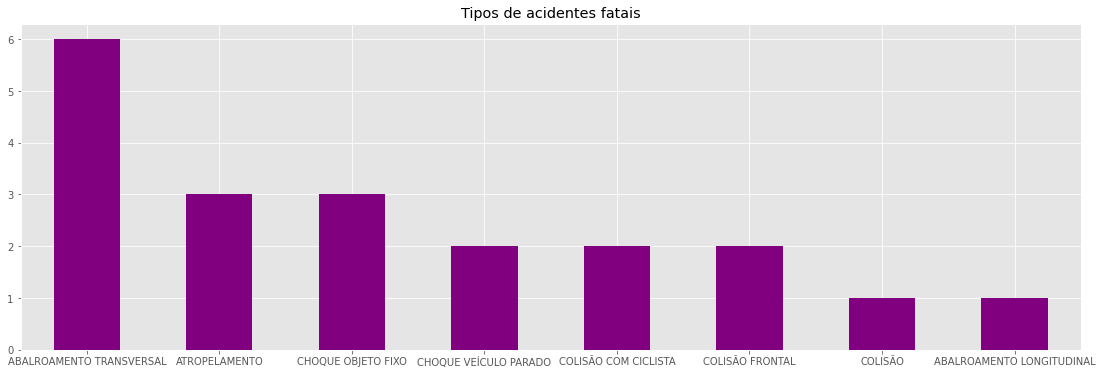

In [6]:
# tipos de acidentes fatais
mpl.style.use(['ggplot'])
df_fatal = df[df.natureza_acidente == 'VÍTIMA FATAL'].copy()
df_fatal.tipo.value_counts().plot(kind='bar', color='purple', figsize=(19,6))
plt.title('Tipos de acidentes fatais')
plt.xticks(rotation=360)
plt.show()

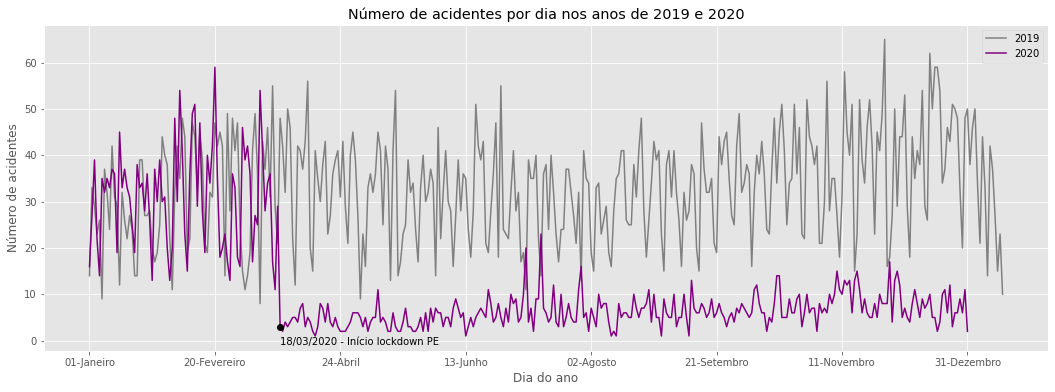

In [64]:
df_count_19 = df_19.groupby('data_new').agg('count').reset_index()
df_count_19['new_data'] = df_count_19.data_new.apply(lambda x:str(x[3:]) + '-' + dicio_meses[str(x[:2])] )
df_count_19.set_index('new_data')._id.plot(kind='line',  figsize=(18,6), color='gray')

df_count = df.groupby('data_new').agg('count').reset_index()
df_count['new_data'] = df_count.data_new.apply(lambda x:str(x[3:]) + '-' + dicio_meses[str(x[:2])] )
df_count.set_index('new_data')._id.plot(kind='line',  figsize=(18,6), color='purple')

plt.legend(labels=['2019', '2020'])
plt.title('Número de acidentes por dia nos anos de 2019 e 2020')
plt.xlabel('Dia do ano')
plt.ylabel('Número de acidentes')
plt.text(76, -1,'18/03/2020 - Início lockdown PE')
plt.plot(76, 3, 'o', color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f414d15e0d0> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4157511290> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


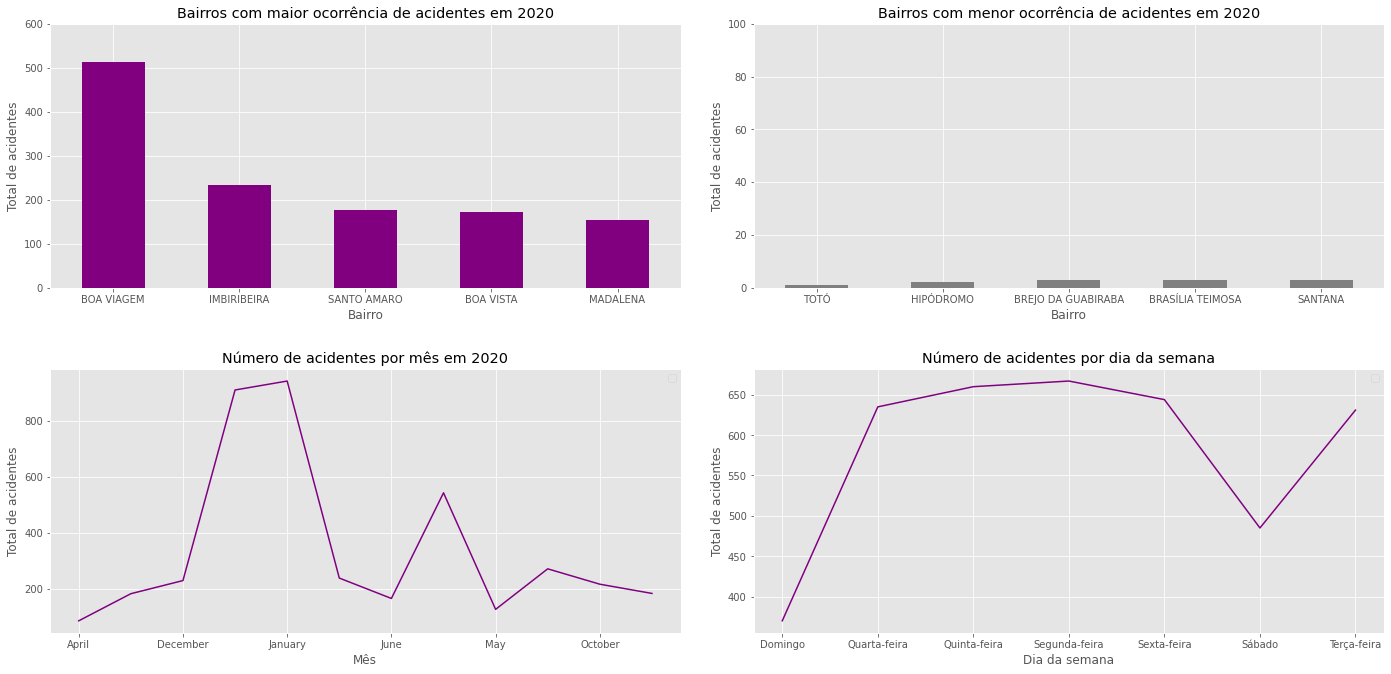

In [82]:


fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

# bairros com maior indicência de acidentes
ax = df.groupby('bairro').agg('count').sort_values(by='_id', ascending=False).iloc[:5, 0].plot(kind='bar', figsize=(15,10), color='purple', ax=ax)
ax.set_title('Bairros com maior ocorrência de acidentes em 2020')
ax.tick_params(labelrotation=360)
ax.set_ylim([0,600])
ax.set_xlabel('Bairro')
ax.set_ylabel('Total de acidentes')


# bairros com menor indicência de acidentes
ax1 = df.groupby('bairro').agg('count').sort_values(by='_id', ascending=True).iloc[:5, 0].plot(kind='bar', figsize=(20,10), color='gray', ax=ax1)
ax1.set_title('Bairros com menor ocorrência de acidentes em 2020')
ax1.tick_params(labelrotation=360)
ax1.set_ylim([0,100])
ax1.set_xlabel('Bairro')
ax1.set_ylabel('Total de acidentes')


# número de acidentes por mês no ano de 2020
ax2 = df.groupby(['mes']).agg('count').iloc[:, :1].plot(kind='line', figsize=(20,10), color='purple', ax=ax2)
ax2.set_title('Número de acidentes por mês em 2020')
ax2.tick_params(labelrotation=360)
ax2.set_xlabel('Mês')
ax2.set_ylabel('Total de acidentes')


# número de acidentes por dia da semana
ax3 = df.groupby(['dia_semana']).agg('count').iloc[:, :1].plot(kind='line', figsize=(20,10), color='purple', ax=ax3)
ax3.set_title('Número de acidentes por dia da semana')
ax3.tick_params(labelrotation=360)
ax3.set_xlabel('Dia da semana')
ax3.set_ylabel('Total de acidentes')

fig.tight_layout(pad=3.)
plt.show()

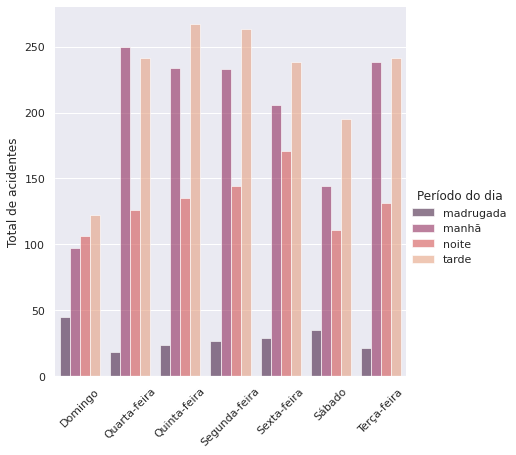

In [ ]:
dia_semana_df = df.groupby(['dia_semana', 'periodo_dia']).agg('count')
dia_semana_df.reset_index(inplace=True)
g = sns.catplot(
    data=dia_semana_df, kind="bar",
    x="dia_semana", y="_id", hue="periodo_dia",
    ci="sd", alpha=.6, height=6, palette="rocket"
)
g.despine(left=True)
g.set_axis_labels("", "Total de acidentes")
plt.xticks(rotation=45)
g.legend.set_title("Período do dia")